<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5043 non-null   int64  
 1   director_name         4939 non-null   object 
 2   duration              5028 non-null   float64
 3   actor_2_name          5030 non-null   object 
 4   genres                5043 non-null   object 
 5   actor_1_name          5036 non-null   object 
 6   movie_title           5043 non-null   object 
 7   num_voted_users       5043 non-null   int64  
 8   actor_3_name          5020 non-null   object 
 9   movie_imdb_link       5043 non-null   object 
 10  num_user_for_reviews  5022 non-null   float64
 11  language              5029 non-null   object 
 12  country               5038 non-null   object 
 13  title_year            4935 non-null   float64
 14  imdb_score            5043 non-null   float64
dtypes: float64(4), int64(

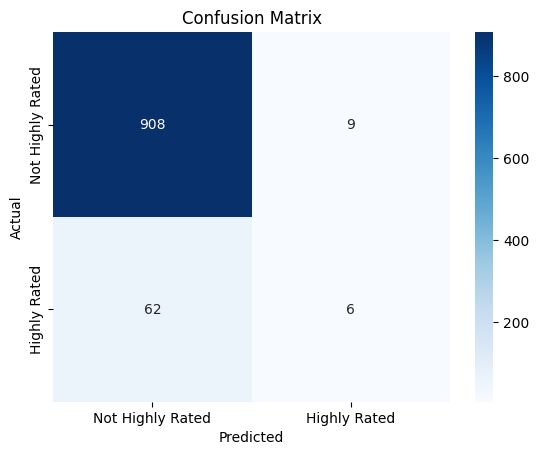

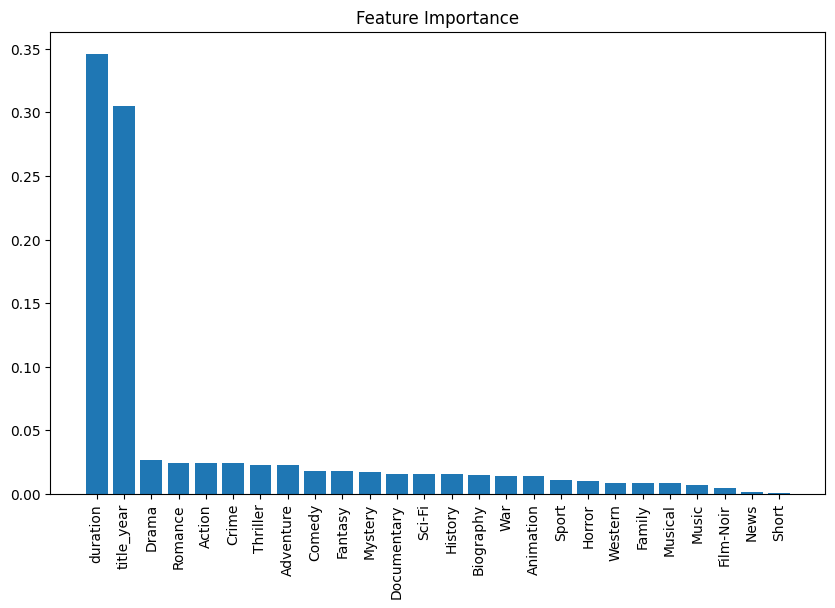

Misclassified Samples:
      duration  title_year  Action  Adventure  Animation  Biography  Comedy  \
3553     115.0      2007.0       1          0          0          0       0   
4028     107.0      2014.0       0          0          0          0       0   
2700     142.0      1985.0       0          0          0          0       0   
4585      96.0      2012.0       0          0          0          1       0   
296      165.0      2012.0       0          0          0          0       0   

      Crime  Documentary  Drama  ...  News  Romance  Sci-Fi  Short  Sport  \
3553      1            0      1  ...     0        0       0      0      0   
4028      0            0      1  ...     0        0       0      0      0   
2700      0            0      1  ...     0        0       1      0      0   
4585      1            1      0  ...     0        0       0      0      0   
296       0            0      1  ...     0        0       0      0      0   

      Thriller  War  Western  actual  p

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/movie_data[1].csv')

print(df.info())
print(df.head())

df = df.dropna(subset=['duration', 'genres', 'imdb_score', 'title_year'])

genres_encoded = df['genres'].str.get_dummies(sep='|')
df = pd.concat([df, genres_encoded], axis=1)

df['high_rating'] = (df['imdb_score'] >= 8).astype(int)

features = ['duration', 'title_year'] + list(genres_encoded.columns)
X = df[features]
y = df['high_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Highly Rated', 'Highly Rated'], yticklabels=['Not Highly Rated', 'Highly Rated'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.show()

X_test['actual'] = y_test
X_test['predicted'] = y_pred
misclassified = X_test[X_test['actual'] != X_test['predicted']]
print("Misclassified Samples:")
print(misclassified.head(5))
